# Hardware Ecosystem

## Nic Lane (ndl32)

## DeepNN

In [1]:
from lecture1_imports import *

## Plan for the Day


- __Introduction__
    - __How did we get here?__
- Hardware Foundation
- Parallelism Leveraging
- Data Movement and Bandwidth Pressures
- Closing messages


## Hardware at Deep Learning's birth
<br/> 

<table>

<tr>
<td> <center> <h2> New York Times (1958) </h2> </center> </td>
<td> <center> <h2> Eniac, 1950s SoTA Hardware </h2> </center> </td></tr>

<tr>
<td> <img src="figures/fig1.1.png" alt="Drawing" style="width: 800px;"/> </td>
<td> <img src="figures/fig1.2.JPG" alt="Drawing" style="width: 800px;"/> </td>
</tr>

</table>

## How did we get here? Deep Learning requires _peta_ FLOPS
<br/> 
<center>0.01 PFLOP (left) = $10^{13}$ FLOPS (right)
<table><tr>
<td> <img src="figures/fig1.3.png" alt="Drawing" style="width: 945px;"/> </td>
<td> <img src="figures/fig1.4.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>

Credits: Our World in Data (https://ourworldindata.org/technological-progress)

## Plan for the Day

- Introduction
- __Hardware Foundation__
    - __Internal organisation of processors__
    - __A typical organisation of a DL system__
    - __Two pillars: Data Movement & Parallelism__
- Parallelism Leveraging
- Data Movement and Bandwidth Pressures
- Closing messages


## Internal Organisation of Processors

<br/>
<table>
<tr>
<td><center><img src=figures/fig1.5.jpg alt="Drawing" style="width: 800px;"/></td>
<td><center><img src=figures/fig1.6.jpg alt="Drawing" style="width: 1100px;"/></td>
<td><center><img src=figures/fig1.7.png alt="Drawing" style="width: 900px;"/></td>
</tr>
</table>

## Central Processing Unit (CPU)

<p><img src=figures/fig1.8.png align="right" alt="Drawing" style="width: 700px;"/>
<ul>

<li>General-purpose processor (in use since mid-1950s)</li>
<li>CPU is composed of cores, each of which consists of several threads.</li>
<li>Example high-end performance:</li>
    <ul><li>AMD Ryzen 9 5950X</li></ul>
    <ul><li>No. Cores:&emsp;&emsp;&emsp; <b>16</b></li></ul>
    <ul><li>No. Threads:&emsp;&emsp; <b>32</b></li></ul>
    <ul><li>Clock speed:&emsp;&emsp; <b>3.4GHz</b>, boost up to <b>4.9GHz</b></li></ul>
    <ul><li>L2 cache:&emsp;&emsp;&ensp;&emsp; <b>8 MB</b></li></ul>
    <ul><li>L3 cache:&emsp;&emsp;&ensp;&emsp; <b>64 MB</b></li></ul>
<p>

In [2]:
our_custom_net = BasicFCModel()
our_custom_net.cpu()
# OR
device = torch.device('cpu')
our_custom_net.to(device)

BasicFCModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

## Graphics Processing Unit

<p><img src=figures/fig1.9.png align="right" alt="Drawing" style="width: 700px;"/>
<ul>

<li>Parallelism-exploiting Accelerator</li>
<li>Originally used for graphics processing (in use since 1970s)</li>
<li>GPU is composed of a large number of threads organised into blocks (cores)</li>
<li>Example high-end performance:</li>
    <ul><li>NVIDIA GEFORCE RTX 3090</li></ul>
    <ul><li>No. Threads:&emsp;&emsp; <b>10496</b></li></ul>
    <ul><li>Clock speed:&emsp;&emsp; <b>1.4GHz</b>, boost up to <b>1.7GHz</b></li></ul>
    <ul><li>L2 cache:&emsp;&emsp;&ensp;&emsp; <b>24 GB</b></li></ul>
<p>





In [3]:
if torch.cuda.is_available():
    our_custom_net.cuda()
    # OR
    device = torch.device('cuda:0')
    our_custom_net.to(device)

## Graphics Processing Unit
<p><img src=figures/fig1.9.png align="right" alt="Drawing" style="width: 700px;"/>
<ul>
<li>Register (per thread)</li>
    <ul><li>An automatic variable in kernel function</li></ul>
    <ul><li>Low latency, high bandwidth</li></ul>
<li>Local Memory (per thread)</li>
    <ul><li>Variable in a kernel but can not be fitted in register</li></ul>
<li>Shared Memory (between thread blocks)</li>
    <ul><li>All threads faster than local and global memory</li></ul>
    <ul><li>Use for inter-thread communication</li></ul>
    <ul><li>physically shared with L1 cache</li></ul>
<li>Constant memory</li>
    <ul><li>Per Device Read-only memory</li></ul>
<li>Texture Memory</li>
    <ul><li>Per SM, read-only cache, optimized for 2D spatial locality</li></ul>
<li>Global Memory</li>
<p>





## A typical organisation of a DL system

<p><img src=figures/fig1.10.png align="right" alt="Drawing" style="width: 1050px;"/>
<ul>
<li>Processors</li>
    <ul><li>CPU sits at the centre of the system</li></ul>
<li><u><b>Accelerators</b></u></li>    
    <ul><li>GPUs, TPUs, Eyeriss, other specialised</li></ul>
    <ul><li>Specialised hardware can be designed with exploiting <u><b>parallelism</b></u> in mind</li></ul>    
<li><u><b>Memory hierarchy</b></u></li>
    <ul><li>Caches - smallest and fastest</li></ul>
    <ul><li>Random Access Memory (RAM) - largest and slowest</li></ul>
    <ul><li>Disk / SSD - storage</li></ul>    
    <ul>
        <ul><li>Stores the dataset; in crisis it supplements RAM up to Swap</li></ul>
    </ul>
    <ul><li><u><b>Bandwidth</b></u> can be serious a bottleneck</li></ul>
<li>System, memory, and I/O buses</li>
    <ul><li>Closer to processor - faster</li></ul>  
    <ul><li>Designed to transport fixed-size data chunks</li></ul>     
    <ul><li>Word size is a key system parameter 4 bytes (32 bit) or 8 bytes (64 bit) </pp></ul>    
<li>Auxiliary hardware</li>
    <ul><li>Mouse, keyboard, display</li></ul>     
<p>
    

## Data Movement & Parallelism

<center><img src=figures/fig1.10.png alt="Drawing" style="width: 1200px;"/></center>

## Memory and bandwidth: memory hierarchy

<br/> 
<br/> 

<center><img src=figures/fig1.11.png alt="Drawing" style="width: 1400px;"/>

## Memory and bandwidth: data movement

- Energy and latency are commensurate
- Accessing RAM is 3 to 4 <u>orders of magnitude</u> slower than executing MAC

<br/> 
<br/> 
<br/> 


<center><img src=figures/fig1.12.png alt="Drawing" style="width: 2000px;"/>

## Processor comparison based on memory and bandwidth     
    
<p><img src=figures/fig1.13.png align="right" alt="Drawing" style="width: 900px;"/>
<ul>
<li>CPU has faster I/O bus than GPU, but it has lower bandwidth than GPU.</li>
    <ul><pp>CPU can fetch small pieces of data very fast, GPU fetches them slower but in bulk.</pp></ul>
<li>GPU has more lower-level memory than CPU.</li>
    <ul><pp>Even though each individual thread and thread block have less memory than the</pp></ul> 
    <ul><pp>CPU threads and cores do, there are just so much more threads in the GPU that</pp></ul>  
    <ul><pp><b>taken as a whole</b> they have much more lower-level memory.</pp></ul>
    <ul><pp>This is memory inversion.</pp></ul>
<p>
    

## The case for parallelism - Moore's law is slowing down

- _Moore's law fuelled the prosperity of the past 50 years._

<center><img src=figures/fig1.14.png alt="Drawing" style="width: 1200px;"/>

Credits: Our World in Data (https://ourworldindata.org/technological-progress)

## Plan for the Day

- Introduction
- Hardware Foundation
- __Parallelism Leveraging__
    - __Parallelism in Deep Learning__
    - __Leveraging Deep Learning parallelism__ 
- Data Movement and Bandwidth Pressures
- Closing messages

## The case for parallelism - Moore's law is slowing down

- _As it slows, programmers and hardware designers are searching for alternative drivers of performance growth._

<center><img src=figures/fig1.15.png alt="Drawing" style="width: 1300px;"/>

Credits: Karl Rupp (https://github.com/karlrupp/microprocessor-trend-data)

## Processor comparison based on parallelism


In [5]:
print("matrix multiplication")
a = torch.randn(2048, 2048)
b = torch.randn(2048, 2048)
num_iter = 100
start = time()
for _ in range(num_iter):
    c = a * b
print(f'CPU took {(time() - start)/num_iter:.6f} seconds')

# same test but using GPU
a = a.cuda()
b = b.cuda()
start = time()
for _ in range(num_iter):
    c = a * b
print(f'GPU took {(time() - start)/num_iter:.6f} seconds')

matrix multiplication
CPU took 0.004513 seconds
GPU took 0.000041 seconds


## Plan for the Day

- Introduction
- Hardware Foundation
- __Parallelism Leveraging__
    - __Parallelism in Deep Learning__
    - __Leveraging Deep Learning parallelism__ 
- Data Movement and Bandwidth Pressures
- Closing messages


## Parallelism in Deep Learning training

- Minibatch model update:

<center><img src=figures/fig1.16.png alt="Drawing" style="width: 1000px;"/></center>

- where $\theta^{s}_{l,i}$ is an $i$'s parameter at layer $l$ value at step $s$ of the training process; $r$ is the learning rate; $B$ is the batch size; and $g^{s}_{l,i,b}$ is the $s$-th training step gradient coming from $b$-th training example for parameter update of $i$-th parameter at layer $l$.



## DL parallelism: parallelize backprop through an example

- The matrix multiplications in the forward and backward passes can be parallelized:

<center><img src=figures/fig1.17.png alt="Drawing" style="width: 1000px;"/></center>

- Fast inference is unthinkable without parallel matrix multiplication.
- Frequent synchronization is needed - at each layer the parallel threads need to sync up.

## DL parallelism: parallelize gradient sample computation

- Gradients for individual training examples can be computed in parallel:

<center><img src=figures/fig1.18.png alt="Drawing" style="width: 1000px;"/></center>

- Synchronization is needed only at the point where we sum the individual gradients across the batch.

## DL parallelism: parallelize update iterations

- Gradient updates from separate batches can be computed in parallel:

<center><img src=figures/fig1.19.png alt="Drawing" style="width: 1000px;"/></center>

- Imagine computing $N$ batches at the same time in parallel:
    - We can see this as using $N-1$ outdated gradient when making update based on the second batch.
    - We can see this as using $N$ gradient estimates in place of the usual $1$ that SGD is based on.

## DL parallelism: parallelize the training of multiple models 

- In the course of solving a given DL problem one would often train competing models because of:
    - The choice of hyperparameters such as architecture, initialization,  dropout and learning rates, regularization, ...
    - The desire to build a model ensemble.

<center><img src=figures/fig1.20.jpeg alt="Drawing" style="width: 1800px;"/></center>

- The models are independent of each other and thus can be computed in parallel.

## Leveraging Deep Learning parallelism 

- CPUs, GPUs, multi-GPU, and multi-machine each offer unique opportunities to leverage the four sources of parallelism.


## CPU training

The most a CPU can do for this setup is to:
- Run through the batches _sequentially_ 
- Run through the model _sequentially_
- Run through the batch _sequentially_
- Potentially, _parallelize_ each layer computation between its cores
    - Best case scenario: individual cores can tackle separate nodes / channels as these are independent of each other
- _Parallelize_ matrix multiplication
    - Best case scenario: Matrix multiplication is split between separate cores and threads. The degree of parallelism is, however, negligent.

## CPU training

Consequently:
- Overpowered CPU threads are scrambling to juggle the many nodes / channels they need to compute.
- The CPU is slowed down considerably by the fact that it needs to access its own L3 cache many more times than the GPU would, due to its lower memory access bandwidth. 

In [6]:
lenet = LeNet()
lenet.cpu()
start = time()
train(lenet, MNIST_trainloader)
print(f'CPU took {time()-start:.2f} seconds')

Epoch 1, iter 469, loss 2.298: : 469it [00:10, 44.99it/s]
Epoch 2, iter 469, loss 2.262: : 469it [00:10, 45.69it/s]

CPU took 20.80 seconds


## GPU training

The GPU, on the other hand, can:

- Run through the batches _sequentially_ 
- Run through the model _sequentially_
    - The model and the batch size just fit once in the memory of the GPU we chose.
- In the best case scenario run through the training examples in a batch in _parallel_ 
    - For most GPUs the computation is, however, _sequential_ if their memory is not big enough to hold the entire batch of training examples. 
- _Parallelize_ each layer computation between its cores
    - Groups of several cores are assigned to separate network layers / channels. Cores in the group need not be physically close to each other.
- _Parallelize_ matrix multiplication
    - The matrix multiplication needed to compute a given node / channel is split between the threads in the group that was assigned to it. Each thread computes separate sector of the input. 

## GPU training

Consequently:
- GPU cores are engaged at all times as they sequentially push through the training examples all at the same time.
- All threads need to sync-up at the end of each layer computation so that their outputs can become the inputs to the next layer. 

In [7]:
lenet = LeNet()
lenet.cuda()
batch_size = 128
start = time()
gpu_train(lenet, MNIST_trainloader)
print(f'GPU took {time()-start:.2f} seconds')

Epoch 1, iter 469, iter loss 2.301: : 469it [00:04, 97.39it/s] 
Epoch 2, iter 469, iter loss 2.294: : 469it [00:04, 101.40it/s]

GPU took 9.56 seconds


## GPU parallelism: matrix multiplication example

<br/> 

<table><tr>
<td> <center> <h2> GPU </h2> </center></td>
<td> <center> <h2> Naive implementation </h2> </center></td>
<td> <center> <h2> Shared memory implementation </h2> </center></td>
</tr>
    
<tr>
<td><center><img src=figures/fig1.9.png alt="Drawing" style="width: 500px;"/></center></td>
<td><center><img src=figures/fig1.21.png alt="Drawing" style="width: 500px;"/></center></td>
<td><center><img src=figures/fig1.22.png alt="Drawing" style="width: 500px;"/></center></td>
</tr>
    
<tr>
<td>
    <center><ul><pp><h6> 12 thread blocks, each with 16 threads. </h6></ul></pp></center>
</td>
<td>
    <center><ul><pp><h6>Each <b>thread</b> reads one row of A, one <br>column of B and returns one element of C.</h6></ul></pp></center>
</td>
<td>  
    <center><ul><pp><h6>Each <b>thread <u>block</u></b> is computing <br>one square sub-matrix.</h6> </ul></pp></center>
</td>
</tr>
</table>

    

## GPU parallelism: matrix multiplication example

<br/>
<br/>

<center><img src=figures/fig1.23.png alt="Drawing" style="width: 2000px;"/></center>

## Multi-GPU training

With multiple GPUs we can choose one of the following:

- _Distribute_ the training examples of a batch between GPUs
    - When individual GPUs can not hold the whole batch in the memory, this can be distributed between multiple cards.
    - The computation has to sync-up for each Batch-Norm.
- _Parallelize_ the model computation
    - Separate layers or groups of layers are handled by separate GPUs.
    - Computation syncs between pairs of GPU cards - as the one's outputs are the other's inputs.
    - This creates a flow-through system that will keep all GPUs busy at all times during the training.
    - Batch is processed sequentially, all GPUs sync up after each batch - either dead time or outdated gradients.
- _Parallelize_ the gradient computation
    - Each GPU can be given its own batch if we accept outdated model in gradient computations.

## Multi-GPU training

In [ ]:
our_custom_net_dp = lenet
our_custom_net_dp.cuda()
our_custom_net_dp = nn.DataParallel(our_custom_net_dp, device_ids=[0, 1])
batch_size = 1024
multigpu_trainloader = make_MNIST_loader(batch_size=batch_size)
start = time()
gpu_train(our_custom_net_dp, multigpu_trainloader)
print(f'2 GPUs took {time()-start:.2f} seconds')

## Multi-Machine training

In principle the same options as in multi-GPU:


- _Distribute_ the training examples of a batch between GPUs
    - This is rarely if ever needed on the scale of multi-Machine
- _Parallelize_ the model computation
    - Same principles as in multi-GPU.
- _Parallelize_ the gradient computation
    - Same principles as in multi-GPU.
    
In practice we would either take advantage of the latter two. In extreme examples one might do a combination of multiple options. 

## Parallelism summary: model and data parallelism

<br/> 

<table><tr>
<td> <img src="figures/fig1.24.png" alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="figures/fig1.25.png" alt="Drawing" style="width: 740px;"/> </td>
</tr></table>

## Parallelism bottlenecks: Synchronization & Communication


<p><img src=figures/fig1.26.png align="right" alt="Drawing" style="width: 1100px;"/>
<ul>
<li>DL-training hardware needs to synchronize and communicate very frequently</li>
    <ul><li>Model nodes are heavily interconnected at each model layer.</li></ul>
    <ul><li>Data nodes are interconnected by batch-norm-style layers</li></ul>
    <ul><li>Data nodes are interconnected at gradient computation</li></ul>
<li>This communication occurs between</li>
    <ul><li>Threads in a core (CPU and GPU)</li></ul> 
    <ul><li>Cores within a chip</li></ul>  
    <ul><li>Pieces of hardware </li></ul>
    <ul><pp><i>example: SLI bridge is a connector and a protocol for such a communication</i></pp></ul>
<p>

## Bottlenecks beyond parallelism

- DL training and inference do not take place solely on the accelerator.
    - The accelerator accelerates the gradient computations and updates.
    - The CPU will still need to be loading the data (model, train set) and saving the model (checkpointing).
- The accelerator starves if it waits idly for its inputs due for example to slow CPU, I/O buses, or storage interface (SATA, SSD, NVMe).

In [8]:
lenet.cuda()
batch_size = 64
gpu_trainloader = make_MNIST_loader(batch_size=batch_size, num_workers=1)
start = time()
gpu_train(lenet, gpu_trainloader)
print(f'GPU took {time()-start:.2f} seconds')

Epoch 1, iter 938, iter loss 1.611: : 938it [00:08, 106.60it/s]
Epoch 2, iter 938, iter loss 0.341: : 938it [00:08, 106.17it/s]

GPU took 17.70 seconds


## Plan for the Day

- Introduction
- Hardware Foundation
- Parallelism Leveraging
- __Data Movement and Bandwidth Pressures__
    - __Deep Learning working set__
    - __Mapping Deep Learning onto hardware__
    - __Addressing memory pressure__
- Closing messages


## Deep Learning resource characterisation

In [9]:
# Instantiating model
# model, config = LeNet(), {'input_shape':(1,28,28), 'num_classes':10}
model, config = AlexNet(), {'input_shape':(3,224,224), 'num_classes':1000}

# Adding forward/backward hooks
hooks = add_hooks(model)

## Deep Learning resource characterisation

In [10]:
# Print info table
run_once(model, **config)
get_model_summary(model)

Layer	Parameters	Input shape	Output shape		Gradients shapes
Conv2d    23296     [1,3,224,224]     [1,64,55,55]      [[0],[64,3,11,11],[64],[1,64,55,55]]
MaxPool   0         [1,64,55,55]      [1,64,27,27]      [[1,64,55,55],[1,64,27,27]]
Conv2d    307392    [1,64,27,27]      [1,192,27,27]     [[1,64,27,27],[192,64,5,5],[192],[1,192,27,27]]
MaxPool   0         [1,192,27,27]     [1,192,13,13]     [[1,192,27,27],[1,192,13,13]]
Conv2d    663936    [1,192,13,13]     [1,384,13,13]     [[1,192,13,13],[384,192,3,3],[384],[1,384,13,13]]
Conv2d    884992    [1,384,13,13]     [1,256,13,13]     [[1,384,13,13],[256,384,3,3],[256],[1,256,13,13]]
Conv2d    590080    [1,256,13,13]     [1,256,13,13]     [[1,256,13,13],[256,256,3,3],[256],[1,256,13,13]]
MaxPool   0         [1,256,13,13]     [1,256,6,6]       [[1,256,13,13],[1,256,6,6]]
AvgPool   0         [1,256,6,6]       [1,256,6,6]       [[1,256,6,6],[1,256,6,6]]
Linear    37752832  [1,9216]          [1,4096]          [[1,9216],[9216,4096],[4096],[1,4

## Deep Learning resource characterisation

## Deep Learning working set

- Working set - a collection of all elements needed for executing a given DL layer
    - Input and output activations
    - Parameters (weights & biases)

In [11]:
# let's now use a larger batch_size to measure the working set
run_once(model, **config, batch_size=128)

In [12]:
# get working set info
layer_data = get_working_set_info(model)
colors = ['#ef476f','#ffd166','#06d6a0','#118ab2']

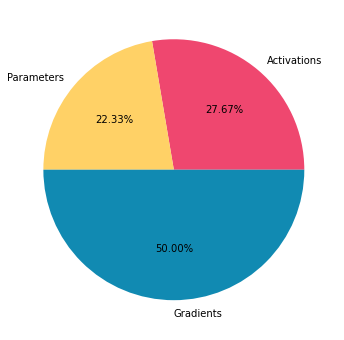

In [13]:
plt.figure(figsize=(16,6))
total_params = sum([d[1][0] for d in layer_data])
total_activations = sum([d[1][2] for d in layer_data])
total_gradients = sum([sum(d[2]) for d in layer_data]) - sum([d[2][0] for d in layer_data]) # we don't count the gradients w.r.t to inputs (since those are passed from next layer)

pie_data = [total_activations, total_params, total_gradients]
langs = ['Activations', 'Parameters', 'Gradients']
_ = plt.pie(pie_data, labels = langs, colors=colors[:2] + [colors[-1]], autopct='%1.2f%%')

## Deep Learning working set - inference

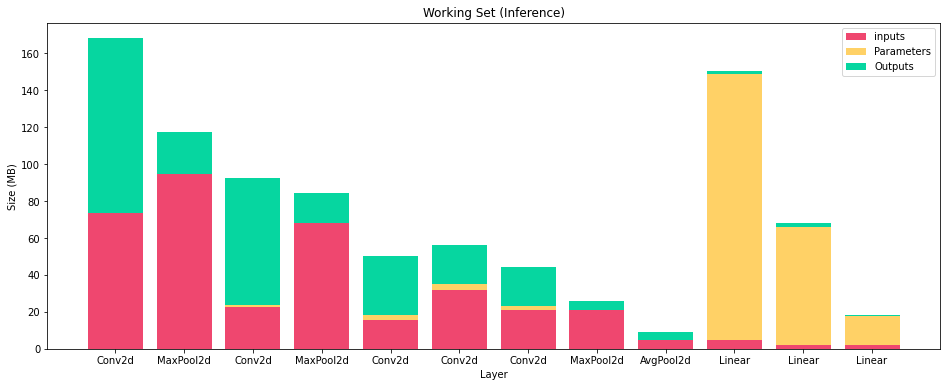

In [14]:
plt.figure(figsize=(16,6))
for i, data in enumerate(layer_data):
    params = to_mb(data[1][0])
    inputs = to_mb(data[1][1])
    outputs = to_mb(data[1][2])
    p1 = plt.bar(i, inputs, color=colors[0])
    p2 = plt.bar(i, params, bottom=inputs, color=colors[1])
    p3 = plt.bar(i, outputs, bottom=inputs+params, color=colors[2])

plt.title("Working Set (Inference)")
plt.ylabel("Size (MB)")
plt.xlabel("Layer")
_ = plt.xticks(range(len(layer_data)), [d[0] for d in layer_data])
_ = plt.legend((p1[0], p2[0], p3[0]), ('inputs', 'Parameters', 'Outputs'))

## Deep Learning working set - training

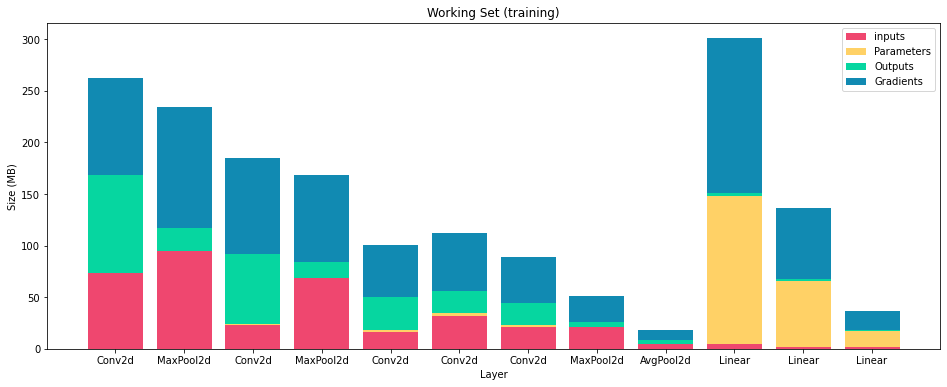

In [15]:
plt.figure(figsize=(16,6))
for i, data in enumerate(layer_data):
    params = to_mb(data[1][0])
    inputs = to_mb(data[1][1])
    outputs = to_mb(data[1][2])
    gradients = to_mb(sum(data[2]))
    p1 = plt.bar(i, inputs, color=colors[0])
    p2 = plt.bar(i, params, bottom=inputs, color=colors[1])
    p3 = plt.bar(i, outputs, bottom=inputs+params, color=colors[2])
    p4 = plt.bar(i, gradients, bottom=inputs+params+outputs, color=colors[3])

plt.title("Working Set (training)")
plt.ylabel("Size (MB)")
plt.xlabel("Layer")
_ = plt.xticks(range(len(layer_data)), [d[0] for d in layer_data])
_ = plt.legend((p1[0], p2[0], p3[0], p4[0]), ('inputs', 'Parameters', 'Outputs', 'Gradients'))

## Working Set requirement exceeding RAM

Using 128 hidden nodes took 8.95 seconds,        training for 1000 epochs would take ~8945.847034454346s
Using 256 hidden nodes took 8.77 seconds,        training for 1000 epochs would take ~8770.206212997437s
Using 512 hidden nodes took 9.53 seconds,        training for 1000 epochs would take ~9530.27367591858s
Using 1024 hidden nodes took 10.51 seconds,        training for 1000 epochs would take ~10514.976978302002s
Using 2048 hidden nodes took 12.91 seconds,        training for 1000 epochs would take ~12914.161682128906s
Using 4096 hidden nodes took 16.84 seconds,        training for 1000 epochs would take ~16842.72336959839s
Using 6144 hidden nodes took 21.17 seconds,        training for 1000 epochs would take ~21170.726776123047s


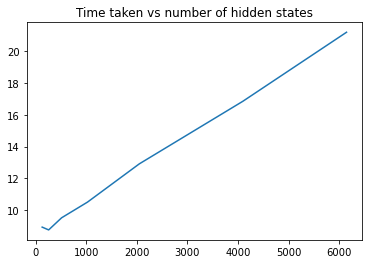

In [16]:
estimate_training_for(LeNet, 1000)

## Working Set requirement exceeding RAM + Swap


In [17]:
print('Loading too many images at once causes errors.')
lenet.cuda()
batch_size = 6000
gpu_trainloader = make_MNIST_loader(batch_size=batch_size, num_workers=1)
start = time()
gpu_train(lenet, gpu_trainloader)
print(f'GPU took {time()-start:.2f} seconds')

Loading too many images at once causes errors.


Epoch 1, iter 10, iter loss 0.250: : 10it [00:07,  1.42it/s]
Epoch 2, iter 2, iter loss 0.246: : 2it [00:02,  1.13s/it]


RuntimeError: DataLoader worker (pid(s) 416) exited unexpectedly

## Mapping Deep Models to hardware: Systolic Arrays

<br/> 

<table><tr>
<td> <center> <h2> Core principle </h2> </center></td>
<td> <center> <h2> Systolic system matrix multiplication </h2> </center></td>
</tr>
<tr>
<td><center><img src=figures/fig1.27.png alt="Drawing" style="width: 900px;"/></center></td>
<td><center><video controls src="figures/fig1.28.mp4" width="900"/></center></td>
</tr>
</table>

## Mapping Deep Models to hardware: weight, input, and output stationarity


#### Weight stationary design 
<center><img src=figures/fig1.29.png style="width: 900px;"/></center>

#### Input stationary design
<center><img src=figures/fig1.30.png style="width: 900px;"/></center>

#### Output stationary design
<center><img src=figures/fig1.31.png style="width: 900px;"/></center>

## Systolic array example: weight stationary Google Tensor Processing Unit (TPU)

<br/> 

<center><img src=figures/fig1.32.png alt="Drawing" style="width: 1200px;"/>

## Plan for the Day

- Introduction
- Hardware Foundation
- Parallelism Leveraging
- Data Movement and Bandwidth Pressures
- __Closing messages__
    - __Deep Learning stack__
    - __Deep Learning and accelerator co-design__
    - __The Hardware and the Software Lottery__


## Deep Learning stack

<br/> 
    
<center><img src=figures/fig1.33.png alt="Drawing" style="width: 1700px;"/>

## Beyond hardware methods

- Sparsity leveraging
    - Sparsity-inducing compression
    - Sparsity leveraging hardware
- Numerical representation 
    - Low precision
    - bfloat16 
    - Quantization
- Low-level implementations
    - GEMM
    - cuDNN

## Deep Learning and accelerator co-design

<br/> 
<br/> 
    
<center><img src=figures/fig1.34.png alt="Drawing" style="width: 800px;"/>

## AlexNet: how GPU memory defined its architecture

- Alex Krizhevsky used two GTX 580 GPUs, each with 3GB of memory.
- Theoretical AlexNet (without mid-way split) working set profiling:

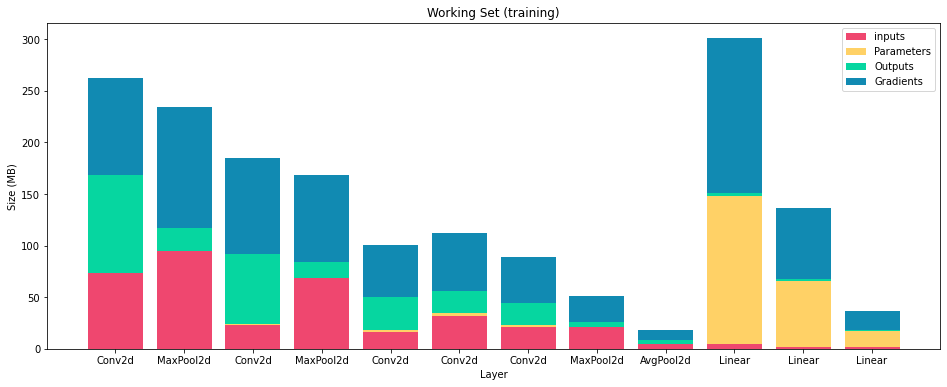

In [18]:
plt.figure(figsize=(16,6))
for i, data in enumerate(layer_data):
    params = to_mb(data[1][0])
    inputs = to_mb(data[1][1])
    outputs = to_mb(data[1][2])
    gradients = to_mb(sum(data[2]))
    p1 = plt.bar(i, inputs, color=colors[0])
    p2 = plt.bar(i, params, bottom=inputs, color=colors[1])
    p3 = plt.bar(i, outputs, bottom=inputs+params, color=colors[2])
    p4 = plt.bar(i, gradients, bottom=inputs+params+outputs, color=colors[3])

plt.title("Working Set (training)")
plt.ylabel("Size (MB)")
plt.xlabel("Layer")
_ = plt.xticks(range(len(layer_data)), [d[0] for d in layer_data])
_ = plt.legend((p1[0], p2[0], p3[0], p4[0]), ('inputs', 'Parameters', 'Outputs', 'Gradients'))

## The actual AlexNet architecture

AlexNet's architecture had to be split down the middle to accommodate the 3GB limit per unit in its two GPUs. 

<center><img src=figures/fig1.35.png alt="Drawing" style="width: 1400px;"/>

## Beyond hardware methods

- Sparsity leveraging
    - Sparsity-inducing compression
    - Sparsity leveraging hardware
- Numerical representation 
    - Low precision
    - bfloat16 
    - Quantization
- Low-level implementations
    - GEMM
    - cuDNN


## The Hardware and the Software Lotteries
<br/>

<center><b><i>The software and hardware lottery describes the success of a software or a piece of hardware <br/> resulting not from its universal superiority, but, rather, from its fit to the broader hardware and software ecosystem.</i></b></center>

<br/> 

<table>

<tr>
<td> <center> <h2> Eniac (1950s) </h2> </center> </td>
<td> <center> <h2> All-optical NN (2019) </h2> </center> </td></tr>

<tr>
<td> <img src="figures/fig1.2.JPG" alt="Drawing" style="width: 800px;"/> </td>
<td> <img src="figures/fig1.36.png" alt="Drawing" style="width: 800px;"/> </td>
</tr>

</table>

## Summary of the Day

- Introduction
- Hardware Foundation
- Parallelism Leveraging
- Data Movement and Bandwidth Pressures
- Closing messages

# Thank you for your attention!